In [60]:
#import libraries
import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [61]:
df=quandl.get("NSE/TRIDENT")

In [62]:
df=df[['Open','High','Low','Close','Total Trade Quantity']]
df['HL_PCT']=(df['High']-df['Low'])/df['Low']*100
df['PCT_change']=(df['Close']-df['Open'])/df['Open']*100
df=df[['Close','HL_PCT','PCT_change','Total Trade Quantity']]
df.tail()

,Close,HL_PCT,PCT_change,Total Trade Quantity
Date,,,,
2018-01-11,90.25,2.777778,-0.110681,1076119.0
2018-01-12,89.35,2.936194,-1.434087,1054346.0
2018-01-15,90.15,1.728946,0.166667,898119.0
2018-01-16,87.85,4.641834,-2.928177,986215.0
2018-01-17,87.05,4.702381,-1.023309,942175.0


In [63]:
forecast_col='Close'
df.fillna(value=-99999, inplace=True)
forecast_out=int(math.ceil(0.01*len(df)))
df['Label']=df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
forecast_out

17

In [64]:
x = np.array(df.drop(['Label'],1))
x = preprocessing.scale(x)
x_lately = x[-forecast_out:]
#x = x[:-forecast_out]

y=df['Label']
y=np.array(y)

print(len(x), len(y))

1650 1650


In [65]:
x_train, x_test, y_train, y_test=cross_validation.train_test_split(x, y, test_size=0.2)
clf=LinearRegression(n_jobs=-1)
clf.fit(x_train, y_train)
accuracy=clf.score(x_test, y_test)
accuracy

0.97230526903722703

In [66]:
forecast_set=clf.predict(x_lately)
forecast_set, accuracy, forecast_out

(array([ 90.9260078 ,  91.12812546,  90.25345182,  88.41502358,
         88.86146961,  88.77235806,  89.63481973,  93.47917375,
         90.41381745,  88.62519556,  87.76452551,  88.32847878,
         88.40373849,  90.7320298 ,  92.3065788 ,  94.18081275,  93.1745121 ]),
 0.97230526903722703,
 17)

In [67]:
df['forecast']=np.nan
last_date=df.iloc[-1].name
last_unix=last_date.timestamp()
one_day=86400
next_unix=last_unix+one_day

In [68]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

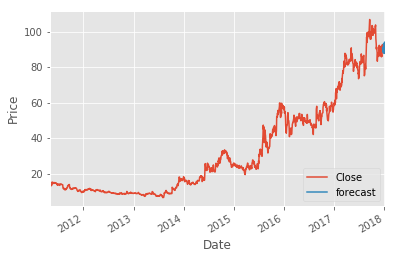

In [69]:
df['Close'].plot()
df['forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()